# Long Term Open Source Metric Analysis

# Hadoop Analysis

In [39]:

neededColumnsMethod =['cbo','cboModified','fanin','fanout','wmc','rfc','loc'
               ]

hadoop_versions = [
         "2.9.2", "2.9.1", "2.9.0","2.8.5", "2.8.4", "2.8.3","2.8.2", "2.8.1","2.8.0",
        "2.7.7","2.7.6","2.7.5","2.7.3","2.7.2","2.7.1","2.7.0","2.6.5", "2.6.4","2.6.3"
        ,"2.6.2","2.6.1","2.6.0","2.5.2","2.5.1","2.5.0","2.4.1","2.4.0","2.3.0"
        ,"3.3.0", "3.3.1", "3.3.2", "3.3.3", "3.3.4", "3.3.5","3.3.6"
       ,"3.2.0", "3.3.1", "3.2.2", "3.2.3", "3.2.4"
       ,"3.1.0","3.1.1","3.1.2","3.1.3","3.1.4"
       ,"3.0.0","3.0.1","3.0.2","3.0.3"
    ]


swt_versions = ["2.1", "3.0", "3.1","3.2", "3.3", "3.4","3.5", "3.6","3.7","3.8","4.2","4.3","4.4","4.5",
                  "4.6","4.7","4.8", "4.9"
            ]

kafka_versions = ["3.4.1","3.4.0","3.3.2","3.3.1",
                "3.2.3","3.2.1","3.2.0","3.1.2","3.1.1","3.1.0","3.0.2","3.0.1","3.0.0",
                "2.8.2","2.8.1","2.8.0","2.7.2","2.7.1","2.7.0","2.6.3","2.6.2","2.6.1",
                "2.6.0","2.5.1","2.5.0","2.4.1","2.4.0","2.3.1","2.3.0",
                "2.2.2","2.2.1","2.2.0","2.1.1","2.1.0","2.0.1","2.0.0","1.1.1","1.1.0",
                "1.0.2","1.0.1","1.0.0","0.11.0.3","0.11.0.2","0.11.0.1","0.11.0.0",
                "0.10.2.2","0.10.2.1","0.10.2.0","0.10.1.1","0.10.1.0","0.10.0.0",
                "0.9.0.1","0.9.0.0","0.8.2.2","0.8.2.1","0.8.2.0","0.8.1.9",
                "0.8.1.1","0.8.1","0.8.0","0.7.9"
            ]
selectedColumns =['cbo','cboModified','fanin','fanout','wmc','rfc','loc', 'count'
               ]

In [40]:
len(hadoop_versions)

49

In [41]:
import pandas as pd

hadoopclassCkMetricsAllVersionsDfMethod = pd.read_csv('DataSource/hadoop_AllCkMetricsAllVersionsMethod.csv').dropna()

swtclassCkMetricsAllVersionsDfMethod = pd.read_csv('DataSource/swt_AllCkMetricsAllVersionsMethod.csv').dropna()

kafkaclassCkMetricsAllVersionsDfMethod = pd.read_csv('DataSource/kafka_AllCkMetricsAllVersionsMethod.csv').dropna()

In [42]:
hadoopBugsAllDf = pd.read_csv('DataSource/hadoop_bugs_all.csv').dropna()
hadoopNewFeaturesAllDf = pd.read_csv('DataSource/hadoop_newFeature_all.csv').dropna()
hadoopImprovementsAllDf = pd.read_csv('DataSource/hadoop_improvements_all.csv').dropna()

swt_bugsDf = pd.read_csv('DataSource/swt_bugs_all.csv').dropna()
kafka_bugsNewFeatureImprovementsDf = pd.read_csv('DataSource/kafka_bugsNewFeatureImprovements.csv').dropna()

In [43]:
cleanedCkMetricsAllVersionsDf = (hadoopclassCkMetricsAllVersionsDfMethod
    .loc[~hadoopclassCkMetricsAllVersionsDfMethod['class'].str.contains("Test")]
    .loc[~hadoopclassCkMetricsAllVersionsDfMethod['class'].str.contains("test")]
    .loc[~hadoopclassCkMetricsAllVersionsDfMethod['class'].str.contains("TEST")]
    .loc[~hadoopclassCkMetricsAllVersionsDfMethod['file'].str.contains("src/test/")]
) 
meanCkGroupedVersions = cleanedCkMetricsAllVersionsDf.groupby("Version", as_index=False)[neededColumnsMethod].mean()
stdCkGroupedVersions = cleanedCkMetricsAllVersionsDf.groupby("Version", as_index=False)[neededColumnsMethod].std()
maxCkGroupedVersions = cleanedCkMetricsAllVersionsDf.groupby("Version", as_index=False)[neededColumnsMethod].max()
locVersions = cleanedCkMetricsAllVersionsDf.groupby("Version", as_index=False)['loc'].sum()


hadoopBugsGroupedDf = hadoopBugsAllDf.groupby(['AVersion']).count().reset_index()
hadoopImprovementsGroupedDf= hadoopImprovementsAllDf.groupby(['Fix Version/s']).count().reset_index()
hadoopNewFeaturesGroupedDf= hadoopNewFeaturesAllDf.groupby(['Fix Version/s']).count().reset_index()

hadoopBugsGroupedDf = hadoopBugsGroupedDf.rename(columns = {'AVersion': 'Version','Issue key': 'count'})[['Version','count']]
hadoopImprovementsGroupedDf = hadoopImprovementsGroupedDf.rename(columns = {'Fix Version/s': 'Version','Issue key': 'count'})[['Version','count']]
hadoopNewFeaturesGroupedDf = hadoopNewFeaturesGroupedDf.rename(columns = {'Fix Version/s': 'Version','Issue key': 'count'})[['Version','count']]

locVersions = pd.merge(locVersions, hadoopBugsGroupedDf,on="Version", how='inner')

meanCkGroupedVersions['numericVersion'] = meanCkGroupedVersions['Version'].apply(lambda x: int(''.join(x.split('.'))))
stdCkGroupedVersions['numericVersion'] = stdCkGroupedVersions['Version'].apply(lambda x: int(''.join(x.split('.'))))
maxCkGroupedVersions['numericVersion'] = maxCkGroupedVersions['Version'].apply(lambda x: int(''.join(x.split('.'))))

locVersions['numericVersion'] = locVersions['Version'].apply(lambda x: int(''.join(x.split('.'))))
mergedMeanBugCountsDf = pd.merge(meanCkGroupedVersions, hadoopBugsGroupedDf, on="Version", how='inner')
mergedStdBugCountsDf = pd.merge(stdCkGroupedVersions, hadoopBugsGroupedDf, on="Version", how='inner')
mergedMaxBugCountsDf = pd.merge(maxCkGroupedVersions, hadoopBugsGroupedDf, on="Version", how='inner')

mergedMeanNewFeatureCountsDf = pd.merge(meanCkGroupedVersions, hadoopImprovementsGroupedDf, on="Version", how='inner')
mergedStdNewFeatureCountsDf = pd.merge(stdCkGroupedVersions, hadoopImprovementsGroupedDf, on="Version", how='inner')
mergedMaxNewFeatureCountsDf = pd.merge(maxCkGroupedVersions, hadoopImprovementsGroupedDf, on="Version", how='inner')

mergedMeanImprovementCountsDf = pd.merge(meanCkGroupedVersions, hadoopNewFeaturesGroupedDf, on="Version", how='inner')
mergedStdImprovementCountsDf = pd.merge(stdCkGroupedVersions, hadoopNewFeaturesGroupedDf, on="Version", how='inner')
mergedMaxImprovementCountsDf = pd.merge(maxCkGroupedVersions, hadoopNewFeaturesGroupedDf, on="Version", how='inner')

hadoopDf = mergedMaxBugCountsDf[selectedColumns]
hadoopDf.head()

,cbo,cboModified,fanin,fanout,wmc,rfc,loc,count
0,22,261,166,261,72,59,342,6
1,24,261,166,261,72,59,342,6
2,24,261,166,261,72,59,342,10
3,25,259,160,259,72,59,342,5
4,25,259,160,259,72,59,342,2


In [44]:
swtcleanedCkMetricsAllVersionsDf = (swtclassCkMetricsAllVersionsDfMethod
    .loc[~swtclassCkMetricsAllVersionsDfMethod['class'].str.contains("Test")]
    .loc[~swtclassCkMetricsAllVersionsDfMethod['class'].str.contains("test")]
    .loc[~swtclassCkMetricsAllVersionsDfMethod['class'].str.contains("TEST")]
    .loc[~swtclassCkMetricsAllVersionsDfMethod['file'].str.contains("src/test/")]
) 

meanCkGroupedVersions = swtcleanedCkMetricsAllVersionsDf.groupby("Version", as_index=False)[neededColumnsMethod].mean()
stdCkGroupedVersions = swtcleanedCkMetricsAllVersionsDf.groupby("Version", as_index=False)[neededColumnsMethod].std()
maxCkGroupedVersions = swtcleanedCkMetricsAllVersionsDf.groupby("Version", as_index=False)[neededColumnsMethod].max()
locVersions = swtcleanedCkMetricsAllVersionsDf.groupby("Version", as_index=False)['loc'].sum()
bugsGroupedDf = swt_bugsDf.groupby(['Version']).count().reset_index()

locVersions['Version'] = locVersions['Version'].astype(str)
swt_bugsDf['Version'] = swt_bugsDf['Version'].astype(str)
locVersions = pd.merge(locVersions, bugsGroupedDf,on="Version", how='inner')
swt_bugsGroupedDf= swt_bugsDf[swt_bugsDf['Version'].isin(swt_versions)].groupby("Version", as_index=False).count().rename(columns = {'Bug ID': 'count'})[['Version','count']]
swt_bugsGroupedDf['Version'] = swt_bugsGroupedDf['Version'].astype(float)

mergedMeanCountsDf = pd.merge(meanCkGroupedVersions, swt_bugsGroupedDf, on="Version", how='inner')
mergedStdCountsDf = pd.merge(stdCkGroupedVersions, swt_bugsGroupedDf, on="Version", how='inner')
mergedMaxCountsDf = pd.merge(maxCkGroupedVersions, swt_bugsGroupedDf, on="Version", how='inner')

swtDf = mergedMaxCountsDf[selectedColumns]
swtDf.head()

,cbo,cboModified,fanin,fanout,wmc,rfc,loc,count
0,33,850,847,75,167,70,461,16
1,33,998,995,84,167,74,461,7
2,33,1121,1118,85,180,80,501,9
3,36,1237,1234,92,184,83,514,3
4,41,1417,1414,115,243,99,715,2


In [48]:
kafkaclassCkMetricsAllVersionsDfMethod = (kafkaclassCkMetricsAllVersionsDfMethod
    .loc[~kafkaclassCkMetricsAllVersionsDfMethod['class'].str.contains("Test")]
    .loc[~kafkaclassCkMetricsAllVersionsDfMethod['class'].str.contains("test")]
    .loc[~kafkaclassCkMetricsAllVersionsDfMethod['class'].str.contains("TEST")]
    .loc[~kafkaclassCkMetricsAllVersionsDfMethod['file'].str.contains("src/test/")]
) 

meanCkGroupedVersions = cleanedCkMetricsAllVersionsDf.groupby("Version", as_index=False)[neededColumnsMethod].mean()
stdCkGroupedVersions = cleanedCkMetricsAllVersionsDf.groupby("Version", as_index=False)[neededColumnsMethod].std()
maxCkGroupedVersions = cleanedCkMetricsAllVersionsDf.groupby("Version", as_index=False)[neededColumnsMethod].max()

mergedMeanCountsDf = pd.merge(meanCkGroupedVersions, kafka_bugsNewFeatureImprovementsDf, on="Version", how='inner')
mergedStdCountsDf = pd.merge(stdCkGroupedVersions, kafka_bugsNewFeatureImprovementsDf, on="Version", how='inner')
mergedMaxCountsDf = pd.merge(maxCkGroupedVersions, kafka_bugsNewFeatureImprovementsDf, on="Version", how='inner')

mergedMaxCountsDf = mergedMaxCountsDf.rename(columns={'ExistingBug': 'count'})
kafkaDf = mergedMaxCountsDf[selectedColumns]
kafkaDf.head()


,cbo,cboModified,fanin,fanout,wmc,rfc,loc,count
0,22,261,166,261,72,59,342,44
1,24,261,166,261,72,59,342,35
2,24,261,166,261,72,59,342,92
3,25,259,160,259,72,59,342,62
4,25,259,160,259,72,59,342,175


In [49]:
df = pd.concat([hadoopDf,swtDf,kafkaDf], ignore_index=True)
df.head()

,cbo,cboModified,fanin,fanout,wmc,rfc,loc,count
0,22,261,166,261,72,59,342,6
1,24,261,166,261,72,59,342,6
2,24,261,166,261,72,59,342,10
3,25,259,160,259,72,59,342,5
4,25,259,160,259,72,59,342,2


In [50]:
from sklearn.model_selection import train_test_split
X = df.drop('count', axis=1)  
y = df['count']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,test_size=0.27,random_state=42)



In [51]:
# Eğitim verilerini normalleştirme
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std

# Test verilerini aynı normalizasyon parametreleriyle normalleştirme
X_test = (X_test - mean) / std

# Çıktı değişkenini normalleştirme
y_train_mean = y_train.mean()
y_train_std = y_train.std()
y_train = (y_train - y_train_mean) / y_train_std

# Test verilerinin çıktı değişkenini aynı normalizasyon parametreleriyle normalleştirme
y_test = (y_test - y_train_mean) / y_train_std

In [52]:
X_train.head()

,cbo,cboModified,fanin,fanout,wmc,rfc,loc
47,1.197100,2.013451,2.004041,-1.531249,2.009303,0.213861,0.995452
34,-0.725584,-0.445428,-0.410802,1.007017,-0.307813,-0.276237,0.026642
64,-0.725584,-0.513730,-0.557982,0.406751,-0.682641,-0.677226,-0.837213
42,0.098423,1.172358,1.222715,-2.543126,1.157422,-0.098020,0.446460
55,2.021107,2.187134,2.165757,-0.965284,2.026341,0.481187,1.673620


In [53]:
from keras import models
from keras import layers

import numpy as np
import tensorflow as tf

# Eager execution'ı etkinleştir
tf.config.run_functions_eagerly(True)


def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse',metrics=['mae'], run_eagerly=True)
    return model


k=4
num_val_samples = int(len(X_train) /k)
num_epoch = 120
all_scores = []
all_mae_histories = []
print(num_val_samples)
for i in range(k):
    print('processing fold #', i)
    
    val_data = X_train[i * num_val_samples: (i+1)* num_val_samples]
    val_targets = y_train[i* num_val_samples: (i+1) * num_val_samples]
    
    
    partial_train_data = np.concatenate([X_train[:i * num_val_samples],
                                        X_train[(i + 1) * num_val_samples:]],
                                       axis = 0)
    
    partial_train_targets = np.concatenate([y_train[:i * num_val_samples],
                                        y_train[(i + 1) * num_val_samples:]],
                                       axis = 0)
    
    model = build_model()
    
    history = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_targets),epochs = num_epoch, batch_size =1, verbose = 1)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)
    val_mae = model.evaluate(val_data, val_targets, verbose=0)[1]
    all_scores.append(val_mae)

15
processing fold # 0
Epoch 1/120
30/45 [===================>..........] - ETA: 0s - loss: 0.8657 - mae: 0.6819

/Users/ayferuckan/anaconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


45/45 [==============================] - 0s 7ms/step - loss: 0.6010 - mae: 0.5322 - val_loss: 2.7234 - val_mae: 0.9736
Epoch 2/120
20/45 [============>.................] - ETA: 0s - loss: 0.6259 - mae: 0.5246

/Users/ayferuckan/anaconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


45/45 [==============================] - 0s 6ms/step - loss: 0.4857 - mae: 0.4203 - val_loss: 2.7447 - val_mae: 0.9555
Epoch 3/120
45/45 [==============================] - 0s 6ms/step - loss: 0.4927 - mae: 0.4252 - val_loss: 2.5651 - val_mae: 0.8896
Epoch 4/120
45/45 [==============================] - 0s 6ms/step - loss: 0.4814 - mae: 0.4337 - val_loss: 2.4496 - val_mae: 0.9136
Epoch 5/120
45/45 [==============================] - 0s 6ms/step - loss: 0.4813 - mae: 0.4068 - val_loss: 2.4228 - val_mae: 0.9351
Epoch 6/120
45/45 [==============================] - 0s 6ms/step - loss: 0.4737 - mae: 0.4201 - val_loss: 2.5389 - val_mae: 0.9177
Epoch 7/120
45/45 [==============================] - 0s 6ms/step - loss: 0.4717 - mae: 0.4256 - val_loss: 2.4797 - val_mae: 0.9100
Epoch 8/120
45/45 [==============================] - 0s 6ms/step - loss: 0.4480 - mae: 0.4210 - val_loss: 2.6115 - val_mae: 0.9189
Epoch 9/120
45/45 [==============================] - 0s 6ms/step - loss: 0.4698 - mae: 0.4218 -

/Users/ayferuckan/anaconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


45/45 [==============================] - 0s 6ms/step - loss: 1.2613 - mae: 0.6595 - val_loss: 0.4469 - val_mae: 0.4566
Epoch 2/120
21/45 [=============>................] - ETA: 0s - loss: 1.1245 - mae: 0.4632

/Users/ayferuckan/anaconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


45/45 [==============================] - 0s 6ms/step - loss: 1.1953 - mae: 0.6207 - val_loss: 0.4824 - val_mae: 0.5392
Epoch 3/120
45/45 [==============================] - 0s 6ms/step - loss: 1.1408 - mae: 0.6640 - val_loss: 0.5161 - val_mae: 0.5872
Epoch 4/120
45/45 [==============================] - 0s 6ms/step - loss: 1.1569 - mae: 0.6421 - val_loss: 0.4874 - val_mae: 0.5480
Epoch 5/120
45/45 [==============================] - 0s 6ms/step - loss: 1.0980 - mae: 0.6707 - val_loss: 0.4722 - val_mae: 0.5439
Epoch 6/120
45/45 [==============================] - 0s 6ms/step - loss: 1.1421 - mae: 0.6451 - val_loss: 0.4742 - val_mae: 0.5369
Epoch 7/120
45/45 [==============================] - 0s 6ms/step - loss: 1.0722 - mae: 0.6489 - val_loss: 0.4494 - val_mae: 0.5141
Epoch 8/120
45/45 [==============================] - 0s 6ms/step - loss: 1.1440 - mae: 0.6163 - val_loss: 0.4656 - val_mae: 0.5124
Epoch 9/120
45/45 [==============================] - 0s 6ms/step - loss: 1.0867 - mae: 0.6435 -

/Users/ayferuckan/anaconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


45/45 [==============================] - 0s 7ms/step - loss: 1.3101 - mae: 0.6671 - val_loss: 0.2300 - val_mae: 0.3486
Epoch 2/120
21/45 [=============>................] - ETA: 0s - loss: 1.1782 - mae: 0.5666

/Users/ayferuckan/anaconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


45/45 [==============================] - 0s 6ms/step - loss: 1.2419 - mae: 0.6520 - val_loss: 0.2694 - val_mae: 0.4050
Epoch 3/120
45/45 [==============================] - 0s 6ms/step - loss: 1.1930 - mae: 0.6880 - val_loss: 0.2510 - val_mae: 0.3387
Epoch 4/120
45/45 [==============================] - 0s 6ms/step - loss: 1.1939 - mae: 0.6538 - val_loss: 0.2443 - val_mae: 0.3036
Epoch 5/120
45/45 [==============================] - 0s 6ms/step - loss: 1.1952 - mae: 0.6429 - val_loss: 0.2797 - val_mae: 0.3759
Epoch 6/120
45/45 [==============================] - 0s 6ms/step - loss: 1.1541 - mae: 0.6714 - val_loss: 0.2467 - val_mae: 0.2911
Epoch 7/120
45/45 [==============================] - 0s 6ms/step - loss: 1.2153 - mae: 0.6269 - val_loss: 0.2699 - val_mae: 0.3657
Epoch 8/120
45/45 [==============================] - 0s 6ms/step - loss: 1.1465 - mae: 0.6625 - val_loss: 0.2452 - val_mae: 0.2866
Epoch 9/120
45/45 [==============================] - 0s 6ms/step - loss: 1.2576 - mae: 0.6342 -

/Users/ayferuckan/anaconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


45/45 [==============================] - 0s 6ms/step - loss: 1.0910 - mae: 0.6443 - val_loss: 0.8561 - val_mae: 0.6920
Epoch 2/120
21/45 [=============>................] - ETA: 0s - loss: 0.7966 - mae: 0.5508

/Users/ayferuckan/anaconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


45/45 [==============================] - 0s 6ms/step - loss: 1.0366 - mae: 0.6141 - val_loss: 0.8454 - val_mae: 0.6856
Epoch 3/120
45/45 [==============================] - 0s 6ms/step - loss: 1.0190 - mae: 0.6133 - val_loss: 0.8479 - val_mae: 0.6804
Epoch 4/120
45/45 [==============================] - 0s 6ms/step - loss: 1.0259 - mae: 0.5780 - val_loss: 0.8734 - val_mae: 0.7128
Epoch 5/120
45/45 [==============================] - 0s 6ms/step - loss: 1.0174 - mae: 0.5842 - val_loss: 0.8614 - val_mae: 0.7143
Epoch 6/120
45/45 [==============================] - 0s 6ms/step - loss: 0.9659 - mae: 0.6105 - val_loss: 0.8841 - val_mae: 0.7303
Epoch 7/120
45/45 [==============================] - 0s 6ms/step - loss: 0.9731 - mae: 0.5898 - val_loss: 0.9184 - val_mae: 0.7538
Epoch 8/120
45/45 [==============================] - 0s 6ms/step - loss: 0.9332 - mae: 0.5733 - val_loss: 0.9267 - val_mae: 0.7119
Epoch 9/120
45/45 [==============================] - 0s 6ms/step - loss: 0.9523 - mae: 0.5778 -

/Users/ayferuckan/anaconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


In [54]:
np.mean(all_scores)


0.720036618411541

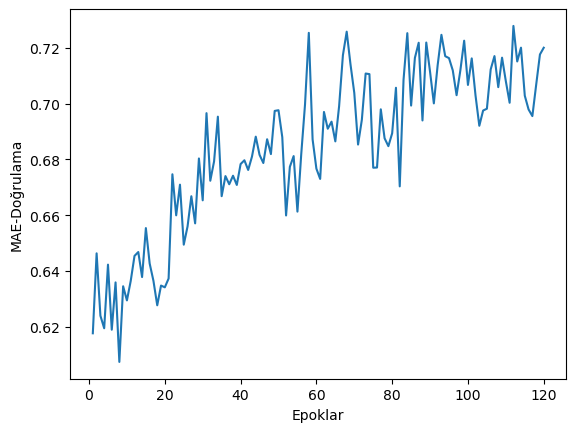

In [55]:
import matplotlib.pyplot as plt

average_mae_history =[np.mean([x[i] for x in all_mae_histories]) for i in range(num_epoch)]

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epoklar')
plt.ylabel('MAE-Doğrulama')
plt.show()

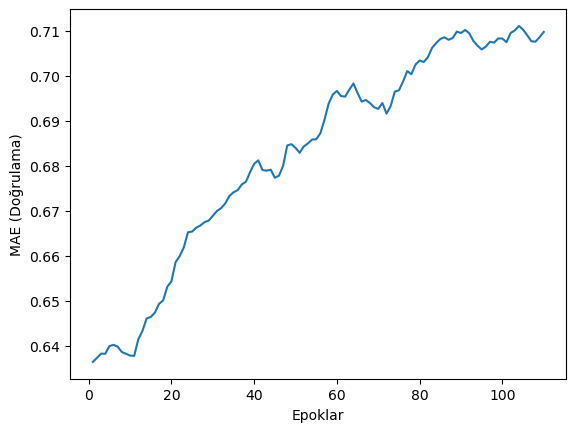

In [56]:


def smooth_curve(points, factor=0.9):
    smoothed_points =[]
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history)+ 1), smooth_mae_history)
plt.xlabel('Epoklar')
plt.ylabel('MAE (Doğrulama)')
plt.show()

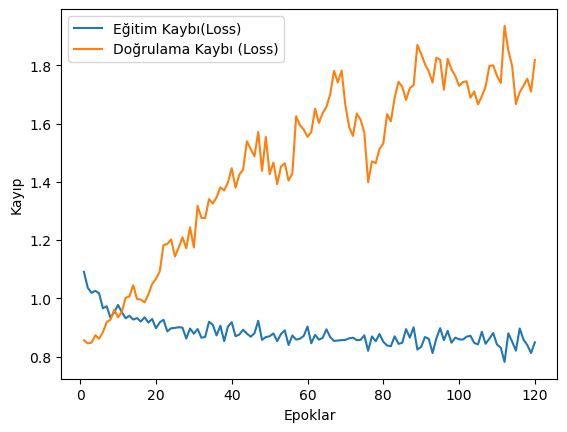

In [57]:
plt.plot(range(1, num_epoch + 1), history.history['loss'], label='Eğitim Kaybı(Loss)')
plt.plot(range(1, num_epoch + 1), history.history['val_loss'], label='Doğrulama Kaybı (Loss)')
plt.xlabel('Epoklar')
plt.ylabel('Kayıp')
plt.legend()
plt.show()